### 0640 모델 분석 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
d1 = pd.read_csv("data/_20210609214725.csv")
d2 = pd.read_csv("data/_20210611080714.csv", error_bad_lines=False)

b'Skipping line 1672: expected 23 fields, saw 27\nSkipping line 1673: expected 23 fields, saw 27\nSkipping line 1903: expected 23 fields, saw 27\nSkipping line 1904: expected 23 fields, saw 27\n'


In [3]:
d3 = pd.read_csv("data/_20210611214333.csv")
d4 = pd.read_csv("data/_20210614110443.csv")
d5 = pd.read_csv("data/_20210614181449.csv")

In [4]:
df = pd.concat([d1, d2, d3, d4, d5])
df.head()

,NUM,CH,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] F0 Vibration Rank1,[SEQ1] F0 Vibration Rank2,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ1] RisingTime,...,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,PASS/FAIL,DUT_ID,DATE,MODEL,MACHINE,REMARK,Unnamed: 22
0,1,CH3,58.0,0.56,0.56,0.56,2.5,0.8,0.0,7.3,...,5.3,1.8,0.5,PASS,NaN,2021-06-09 21:48:52,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
1,1,CH5,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,FAIL,NaN,2021-06-09 21:48:54,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
2,1,CH2,54.0,0.60,0.60,0.60,8.9,3.3,0.0,6.8,...,19.0,6.3,3.1,PASS,NaN,2021-06-09 21:48:56,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
3,1,CH4,56.8,0.56,0.56,0.56,7.1,2.5,0.0,7.9,...,10.1,7.3,3.9,PASS,NaN,2021-06-09 21:48:58,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
4,1,CH1,45.8,0.64,0.64,0.64,18.5,9.7,2.9,11.5,...,19.1,18.1,4.8,PASS,NaN,2021-06-09 21:49:01,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30010 entries, 0 to 8320
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   NUM                         30010 non-null  int64         
 1   CH                          30010 non-null  object        
 2   [SEQ1]  F0 Current          30010 non-null  float64       
 3   [SEQ1]  F0 Vibration        30010 non-null  float64       
 4   [SEQ1]  F0 Vibration Rank1  30010 non-null  float64       
 5   [SEQ1]  F0 Vibration Rank2  30010 non-null  float64       
 6   [SEQ1]  Noise Touch         30010 non-null  float64       
 7   [SEQ1]  Noise THD1          30010 non-null  float64       
 8   [SEQ1]  Noise Band1         30010 non-null  float64       
 9   [SEQ1]  RisingTime          30010 non-null  float64       
 10  [SEQ1]  FallingTime         30010 non-null  float64       
 11  [SEQ2]  F0 Frequency        30010 non-null  float64    

In [6]:
df.set_index('DATE', drop=True, inplace=True)
df.head()

,NUM,CH,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] F0 Vibration Rank1,[SEQ1] F0 Vibration Rank2,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ1] RisingTime,...,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,PASS/FAIL,DUT_ID,MODEL,MACHINE,REMARK,Unnamed: 22
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-09 21:48:52,1,CH3,58.0,0.56,0.56,0.56,2.5,0.8,0.0,7.3,...,0.98,5.3,1.8,0.5,PASS,NaN,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
2021-06-09 21:48:54,1,CH5,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,FAIL,NaN,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
2021-06-09 21:48:56,1,CH2,54.0,0.60,0.60,0.60,8.9,3.3,0.0,6.8,...,1.02,19.0,6.3,3.1,PASS,NaN,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
2021-06-09 21:48:58,1,CH4,56.8,0.56,0.56,0.56,7.1,2.5,0.0,7.9,...,1.01,10.1,7.3,3.9,PASS,NaN,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
2021-06-09 21:49:01,1,CH1,45.8,0.64,0.64,0.64,18.5,9.7,2.9,11.5,...,1.02,19.1,18.1,4.8,PASS,NaN,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN


In [7]:
df.index.hour.value_counts().sort_index()

0     2206
1     2335
2     2804
3     2772
4     2322
5     1451
6     1528
7      917
8      738
9      752
10     662
11    1122
12     894
13     886
14     701
15     417
18     274
19     550
20     311
21     866
22    2621
23    2881
Name: DATE, dtype: int64

### 1. [SEQ1, SEQ2] Vibration / Noise 전체적인 분포

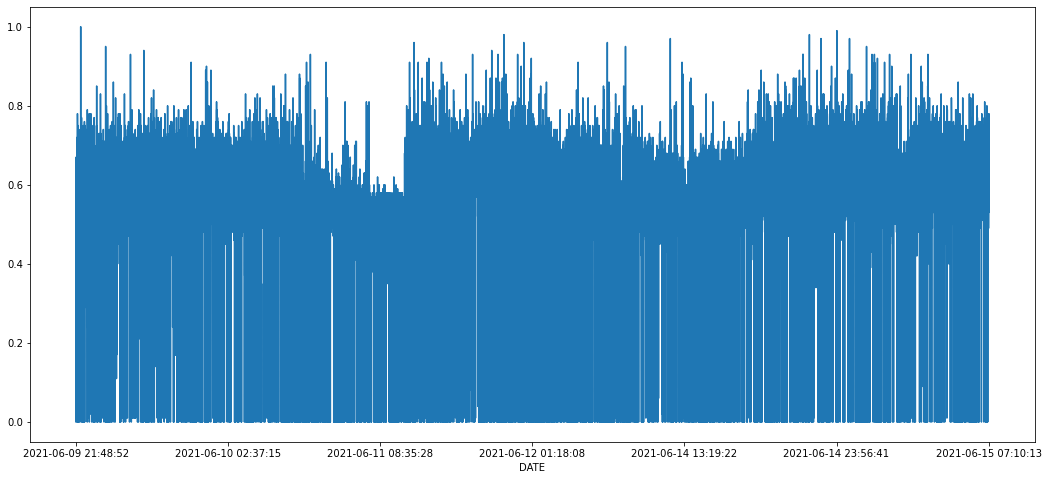

In [20]:
df['[SEQ1]  F0 Vibration'].plot(figsize=(18, 8))

In [159]:
df.resample(rule='W')

DATE
2021-06-13    AxesSubplot(0.125,0.125;0.775x0.755)
2021-06-20    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, Name: [SEQ1]  F0 Vibration, dtype: object

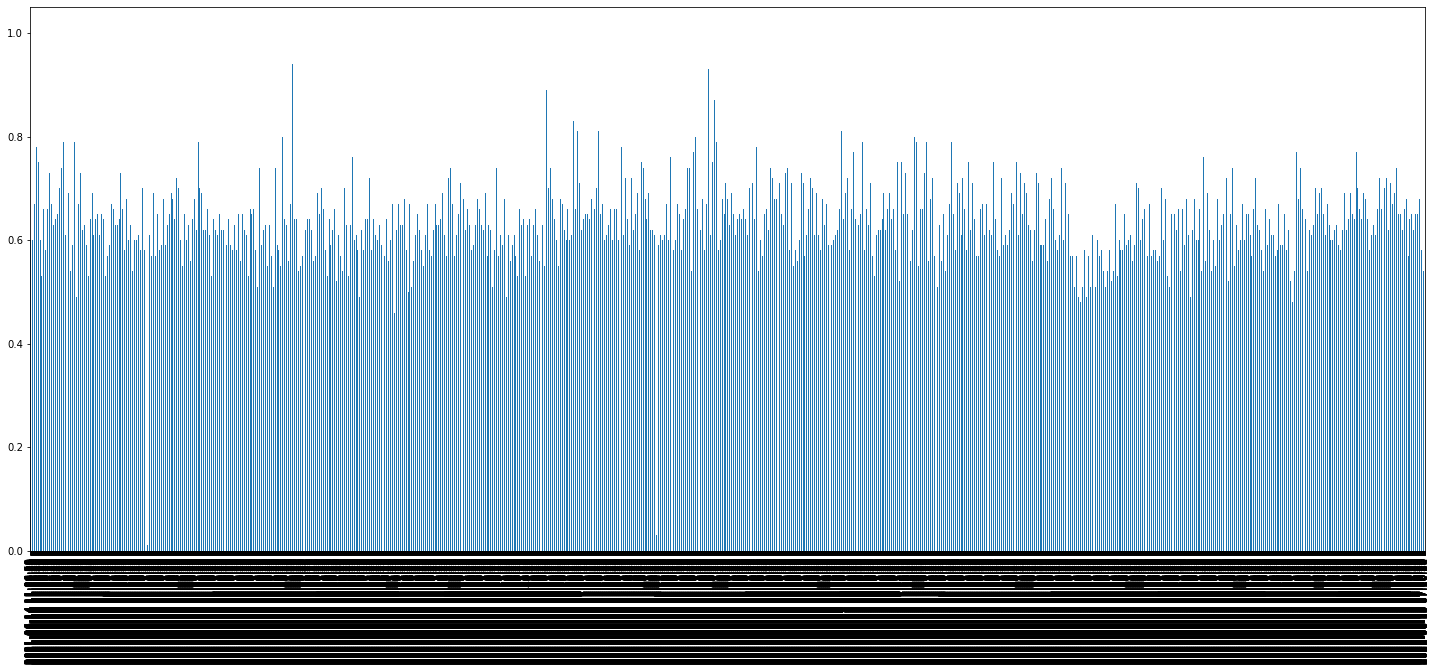

In [167]:
df['[SEQ1]  F0 Vibration'].resample('W').plot(kind='bar', figsize=(25, 10))

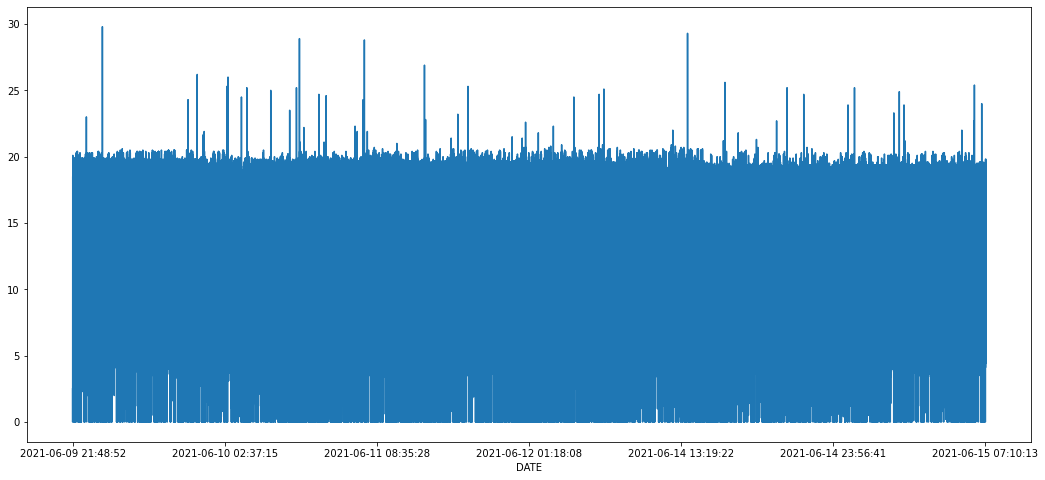

In [34]:
df['[SEQ1]  Noise Touch'].plot(figsize=(18, 8))

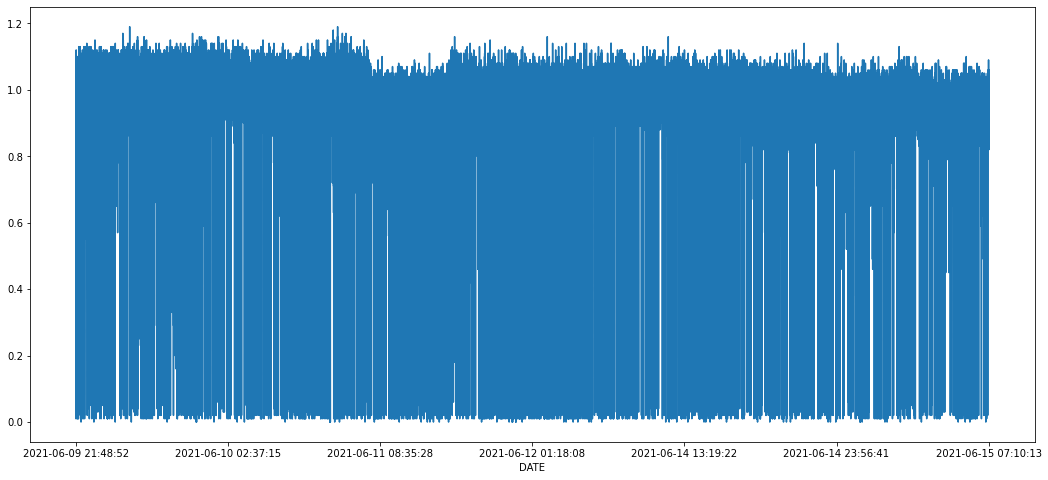

In [35]:
df['[SEQ2]  F0 Vibration'].plot(figsize=(18, 8))

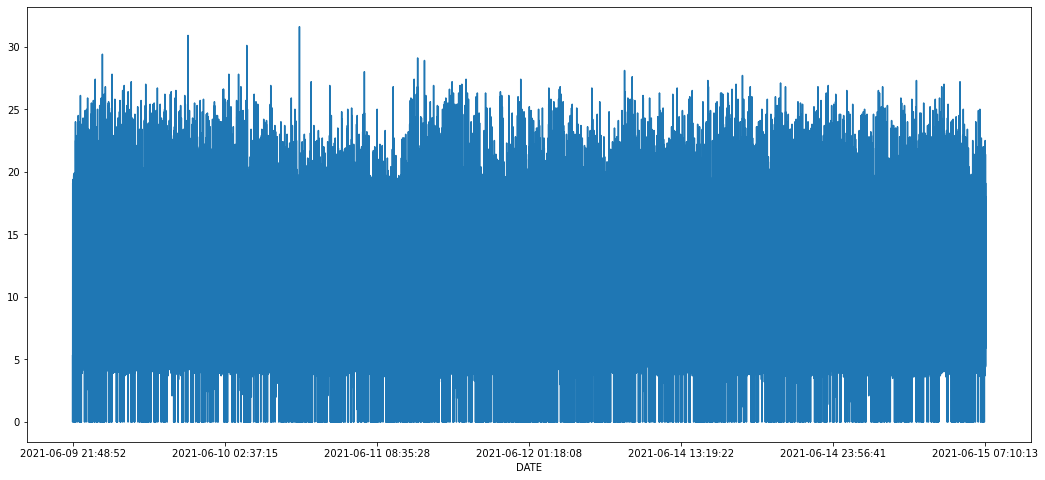

In [36]:
df['[SEQ2]  Noise Touch'].plot(figsize=(18, 8))

#### 2. SEQ1/SEQ2 일별 평균 추이

### F0 Vibration

In [10]:
df2 = pd.concat([d1, d2, d3, d4, d5])

In [11]:
df2['DATE'] = pd.to_datetime(df2['DATE']).dt.normalize()
df2.head()

,NUM,CH,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] F0 Vibration Rank1,[SEQ1] F0 Vibration Rank2,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ1] RisingTime,...,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,PASS/FAIL,DUT_ID,DATE,MODEL,MACHINE,REMARK,Unnamed: 22
0,1,CH3,58.0,0.56,0.56,0.56,2.5,0.8,0.0,7.3,...,5.3,1.8,0.5,PASS,NaN,2021-06-09,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
1,1,CH5,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,FAIL,NaN,2021-06-09,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
2,1,CH2,54.0,0.60,0.60,0.60,8.9,3.3,0.0,6.8,...,19.0,6.3,3.1,PASS,NaN,2021-06-09,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
3,1,CH4,56.8,0.56,0.56,0.56,7.1,2.5,0.0,7.9,...,10.1,7.3,3.9,PASS,NaN,2021-06-09,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
4,1,CH1,45.8,0.64,0.64,0.64,18.5,9.7,2.9,11.5,...,19.1,18.1,4.8,PASS,NaN,2021-06-09,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN


In [12]:
df2.set_index('DATE', drop=True, inplace=True)
df2.head()

,NUM,CH,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] F0 Vibration Rank1,[SEQ1] F0 Vibration Rank2,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ1] RisingTime,...,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,PASS/FAIL,DUT_ID,MODEL,MACHINE,REMARK,Unnamed: 22
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-09,1,CH3,58.0,0.56,0.56,0.56,2.5,0.8,0.0,7.3,...,0.98,5.3,1.8,0.5,PASS,NaN,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
2021-06-09,1,CH5,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,FAIL,NaN,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
2021-06-09,1,CH2,54.0,0.60,0.60,0.60,8.9,3.3,0.0,6.8,...,1.02,19.0,6.3,3.1,PASS,NaN,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
2021-06-09,1,CH4,56.8,0.56,0.56,0.56,7.1,2.5,0.0,7.9,...,1.01,10.1,7.3,3.9,PASS,NaN,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN
2021-06-09,1,CH1,45.8,0.64,0.64,0.64,18.5,9.7,2.9,11.5,...,1.02,19.1,18.1,4.8,PASS,NaN,LM 0640 FRESH MOI 20-5-21,NaN,NaN,NaN


In [13]:
df2_mean = df2.resample(rule='D').mean()
df2_mean

,NUM,[SEQ1] F0 Current,[SEQ1] F0 Vibration,[SEQ1] F0 Vibration Rank1,[SEQ1] F0 Vibration Rank2,[SEQ1] Noise Touch,[SEQ1] Noise THD1,[SEQ1] Noise Band1,[SEQ1] RisingTime,[SEQ1] FallingTime,[SEQ2] F0 Frequency,[SEQ2] F0 Vibration,[SEQ2] Noise Touch,[SEQ2] Noise THD1,[SEQ2] Noise Band1,DUT_ID,MACHINE,REMARK,Unnamed: 22
DATE,,,,,,,,,,,,,,,,,,,
2021-06-09,236.403561,51.412590,0.575129,0.575129,0.575129,12.555193,4.943917,1.190632,10.677067,4.062467e+01,220.188512,0.961649,14.289148,7.689190,2.349724,NaN,NaN,NaN,NaN
2021-06-10,1302.766077,52.555821,0.547824,0.547824,0.547824,12.164651,4.564692,0.937611,9.614795,-1.265211e+14,220.390018,0.942498,13.993226,7.992897,2.262745,NaN,NaN,NaN,NaN
2021-06-11,304.238670,51.867320,0.561437,0.561437,0.561437,12.071647,4.409041,0.939194,10.982441,3.492425e+01,221.192644,0.917654,13.630790,7.995855,2.155796,NaN,NaN,NaN,NaN
2021-06-12,1002.203772,50.662723,0.568151,0.568151,0.568151,11.960176,4.382709,0.978766,11.275288,3.470989e+01,219.956086,0.914034,13.553025,8.055694,2.137595,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-14,394.950325,52.320361,0.565665,0.565665,0.565665,11.907596,4.380159,0.914498,10.125242,3.545047e+01,223.913675,0.937783,13.823596,7.617921,2.142801,NaN,NaN,NaN,NaN
2021-06-15,1460.910264,51.386227,0.590071,0.590071,0.590071,12.036943,4.303448,0.950313,10.233878,3.489950e+01,222.780117,0.919685,13.712099,7.581992,2.025449,NaN,NaN,NaN,NaN


In [14]:
SEQ1_Vibra = pd.DataFrame(df2_mean, columns= ['[SEQ1]  F0 Vibration'])
SEQ1_Vibra

,[SEQ1] F0 Vibration
DATE,
2021-06-09,0.575129
2021-06-10,0.547824
2021-06-11,0.561437
2021-06-12,0.568151
2021-06-13,NaN
2021-06-14,0.565665
2021-06-15,0.590071


In [15]:
SEQ1_Vibra2 = SEQ1_Vibra.drop([SEQ1_Vibra.index[4]])
SEQ1_Vibra2

,[SEQ1] F0 Vibration
DATE,
2021-06-09,0.575129
2021-06-10,0.547824
2021-06-11,0.561437
2021-06-12,0.568151
2021-06-14,0.565665
2021-06-15,0.590071


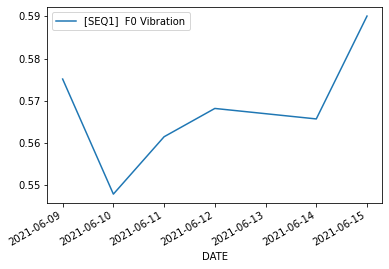

In [16]:
import matplotlib.pyplot as plt
ax = SEQ1_Vibra2.plot()
plt.show()

In [17]:
SEQ2_Vibra = pd.DataFrame(df2_mean, columns= ['[SEQ2]  F0 Vibration'])
SEQ2_Vibra2 = SEQ2_Vibra.drop([SEQ1_Vibra.index[4]])
SEQ2_Vibra2

,[SEQ2] F0 Vibration
DATE,
2021-06-09,0.961649
2021-06-10,0.942498
2021-06-11,0.917654
2021-06-12,0.914034
2021-06-14,0.937783
2021-06-15,0.919685


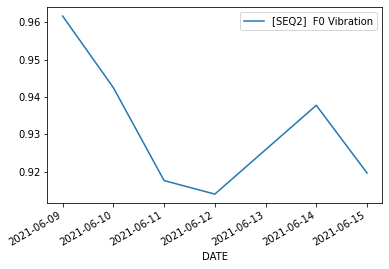

In [18]:
import matplotlib.pyplot as plt
ax = SEQ2_Vibra2.plot()
plt.show()

### Noise

In [19]:
SEQ1_noise = pd.DataFrame(df2_mean, columns= ['[SEQ1]  Noise Touch'])

In [20]:
SEQ1_noise = SEQ1_noise.drop([SEQ1_noise.index[4]])
SEQ1_noise

,[SEQ1] Noise Touch
DATE,
2021-06-09,12.555193
2021-06-10,12.164651
2021-06-11,12.071647
2021-06-12,11.960176
2021-06-14,11.907596
2021-06-15,12.036943


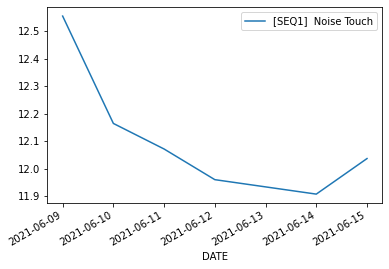

In [21]:
ax = SEQ1_noise.plot()
plt.show()

In [28]:
SEQ1_noise2 = pd.DataFrame(df2_mean, columns= ['[SEQ1]  Noise THD1'])
SEQ1_noise2 = SEQ1_noise2.drop([SEQ1_noise2.index[4]])
SEQ1_noise2

,[SEQ1] Noise THD1
DATE,
2021-06-09,4.943917
2021-06-10,4.564692
2021-06-11,4.409041
2021-06-12,4.382709
2021-06-14,4.380159
2021-06-15,4.303448


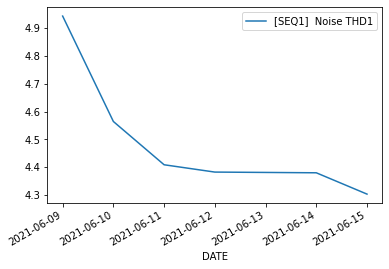

In [29]:
ax = SEQ1_noise2.plot()
plt.show()

In [32]:
SEQ1_noise3 = pd.DataFrame(df2_mean, columns= ['[SEQ1]  Noise Band1'])
SEQ1_noise3 = SEQ1_noise3.drop([SEQ1_noise3.index[4]])
SEQ1_noise3

,[SEQ1] Noise Band1
DATE,
2021-06-09,1.190632
2021-06-10,0.937611
2021-06-11,0.939194
2021-06-12,0.978766
2021-06-14,0.914498
2021-06-15,0.950313


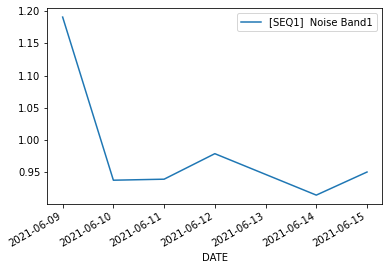

In [33]:
ax = SEQ1_noise3.plot()
plt.show()

In [22]:
SEQ2_noise = pd.DataFrame(df2_mean, columns= ['[SEQ2]  Noise Touch'])

In [23]:
SEQ2_noise = SEQ2_noise.drop([SEQ2_noise.index[4]])
SEQ2_noise

,[SEQ2] Noise Touch
DATE,
2021-06-09,14.289148
2021-06-10,13.993226
2021-06-11,13.630790
2021-06-12,13.553025
2021-06-14,13.823596
2021-06-15,13.712099


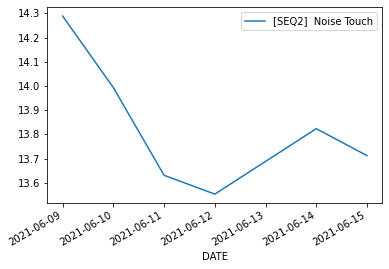

In [24]:
ax = SEQ2_noise.plot()
plt.show()

In [36]:
SEQ2_noise2 = pd.DataFrame(df2_mean, columns= ['[SEQ2]  Noise THD1'])
SEQ2_noise2 = SEQ2_noise2.drop([SEQ2_noise2.index[4]])
SEQ2_noise2

,[SEQ2] Noise THD1
DATE,
2021-06-09,7.689190
2021-06-10,7.992897
2021-06-11,7.995855
2021-06-12,8.055694
2021-06-14,7.617921
2021-06-15,7.581992


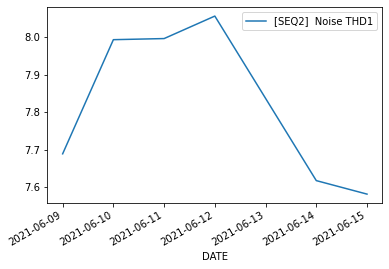

In [37]:
ax = SEQ2_noise2.plot()
plt.show()

In [39]:
SEQ2_noise3 = pd.DataFrame(df2_mean, columns= ['[SEQ2]  Noise Band1'])
SEQ2_noise3 = SEQ2_noise3.drop([SEQ2_noise3.index[4]])
SEQ2_noise3

,[SEQ2] Noise Band1
DATE,
2021-06-09,2.349724
2021-06-10,2.262745
2021-06-11,2.155796
2021-06-12,2.137595
2021-06-14,2.142801
2021-06-15,2.025449


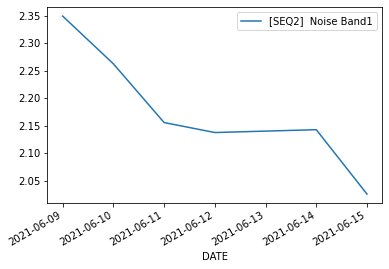

In [41]:
ax = SEQ2_noise3.plot()
plt.show()

### 상관분석

### 1. SEQ1 상관분석

In [8]:
SEQ1_df = df[['[SEQ1]  F0 Current', '[SEQ1]  F0 Vibration', '[SEQ1]  Noise Touch', '[SEQ1]  Noise THD1', '[SEQ1]  Noise Band1']]

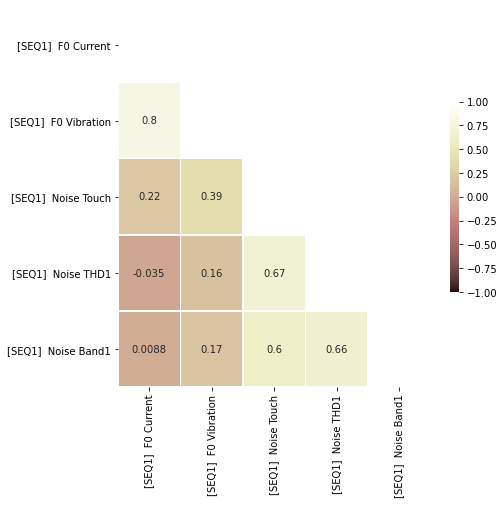

In [45]:
data = SEQ1_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data, 
            cmap = 'pink', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

##### 상관분석을 통해, 알아내고자 하는 것 : 고정 주파수 Vibration과 Noise의 선형관계

##### [SEQ1]  F0 Vibration과 Noise Touch의 상관계수 : 0.39
##### [SEQ1]  F0 Vibration과 Noise THD1의 상관계수 : 0.16
##### [SEQ1]  F0 Vibration과 Noise Band1의 상관계수 : 0.17


##### - 피어슨 상관계수를 구하는 함수를 이용해 (상관계수, p값)을 확인하여 결론에 적용시킨다.

##### - p값을 확인하지 않으면 절대 안될 것.. p값이 0.01 혹은 0.05보다 작더라도 정확히 상관계수가 높다, 낮다라고 판단하기는 어렵지만
##### 어느정도 범위 내에서 결론을 내릴 수 있을 것이다.

In [10]:
import scipy.stats as stats
stats.pearsonr(x = SEQ1_df['[SEQ1]  F0 Vibration'], y = SEQ1_df['[SEQ1]  Noise Touch'])

(0.3919754281144049, 0.0)

In [16]:
import scipy.stats as stats
stats.pearsonr(x = SEQ1_df['[SEQ1]  F0 Vibration'], y = SEQ1_df['[SEQ1]  Noise THD1'])

(0.15966800434793404, 1.5251273534024292e-170)

In [15]:
import scipy.stats as stats
stats.pearsonr(x = SEQ1_df['[SEQ1]  F0 Vibration'], y = SEQ1_df['[SEQ1]  Noise Band1'])

(0.17270527522079016, 1.2880918418263885e-199)

#### 결론 : 
##### 양의 상관관계를 띄며, Vibration과 Noise THD1, Noise Band1 
##### 둘의 선형관계는 거의 없다고 할 수 있다.
##### Vibration이 증가한다고해서, Nosie의 값이 증가하지 않는다.

##### Vibration과 Noise Touch는 0.39로, 약한 선형적인 관계를 갖는다고 할 수 있다.

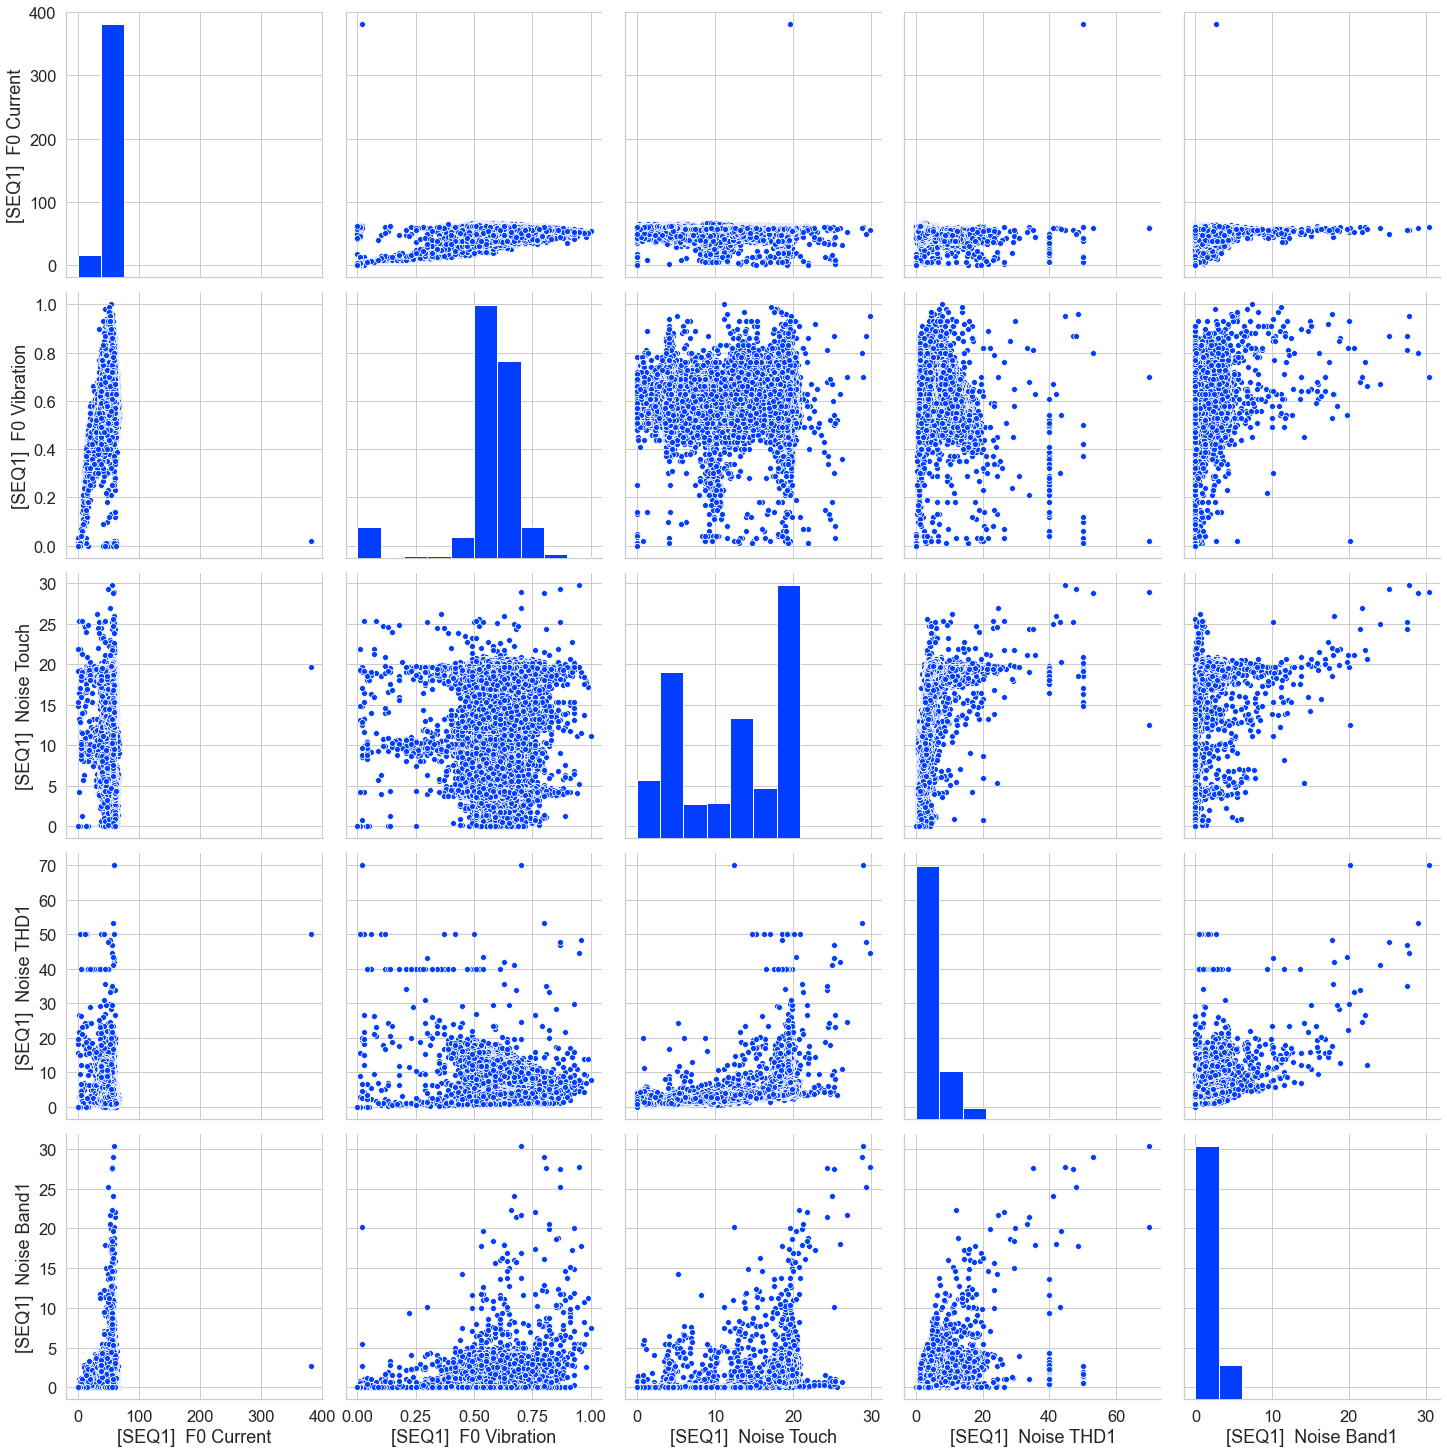

In [46]:
plt.style.use('dark_background') 
sns.set(style="whitegrid",palette="bright", font_scale=1.5) 
sns.pairplot(SEQ1_df, height=4)

### 2. SEQ2 상관분석

In [11]:
SEQ2_df = df[['[SEQ2]  F0 Vibration', '[SEQ2]  Noise Touch', '[SEQ2]  Noise THD1', '[SEQ2]  Noise Band1']]

In [50]:
data2 = SEQ2_df.corr()

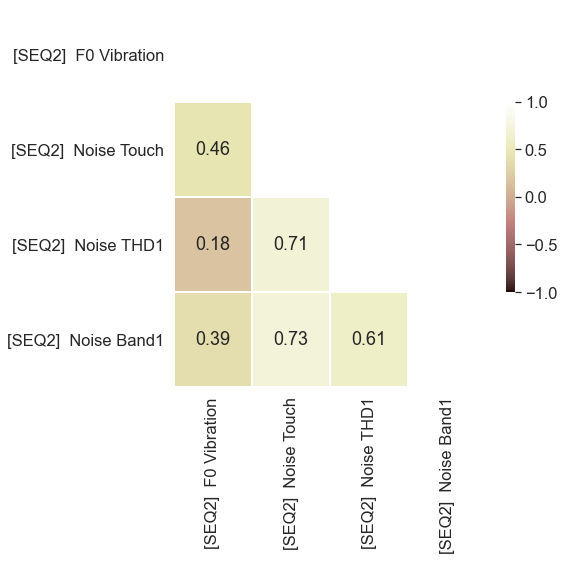

In [52]:
data2 = SEQ2_df.corr()
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(data2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data2, 
            cmap = 'pink', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1  
           )  
plt.show()

##### 고정 주파수 Vibration과 Noise의 선형관계

##### [SEQ2]  F0 Vibration과 Noise Touch의 상관계수 : 0.39
##### [SEQ2]  F0 Vibration과 Noise THD1의 상관계수 : 0.18
##### [SEQ2]  F0 Vibration과 Noise Band1의 상관계수 : 0.39

##### - 피어슨 상관계수를 구하는 함수를 이용해 (상관계수, p값)을 확인하여 결론에 적용시킨다.
##### - p값을 확인하지 않으면 절대 안될 것.. p값이 0.01 혹은 0.05보다 작더라도 정확히 상관계수가 높다, 낮다라고 판단하기는 어렵지만
##### 어느정도 범위 내에서 결론을 내릴 수 있을 것이다.

In [14]:
import scipy.stats as stats
stats.pearsonr(x = SEQ2_df['[SEQ2]  F0 Vibration'], y = SEQ2_df['[SEQ2]  Noise THD1'])

(0.17802229466057773, 3.6280803902273037e-212)

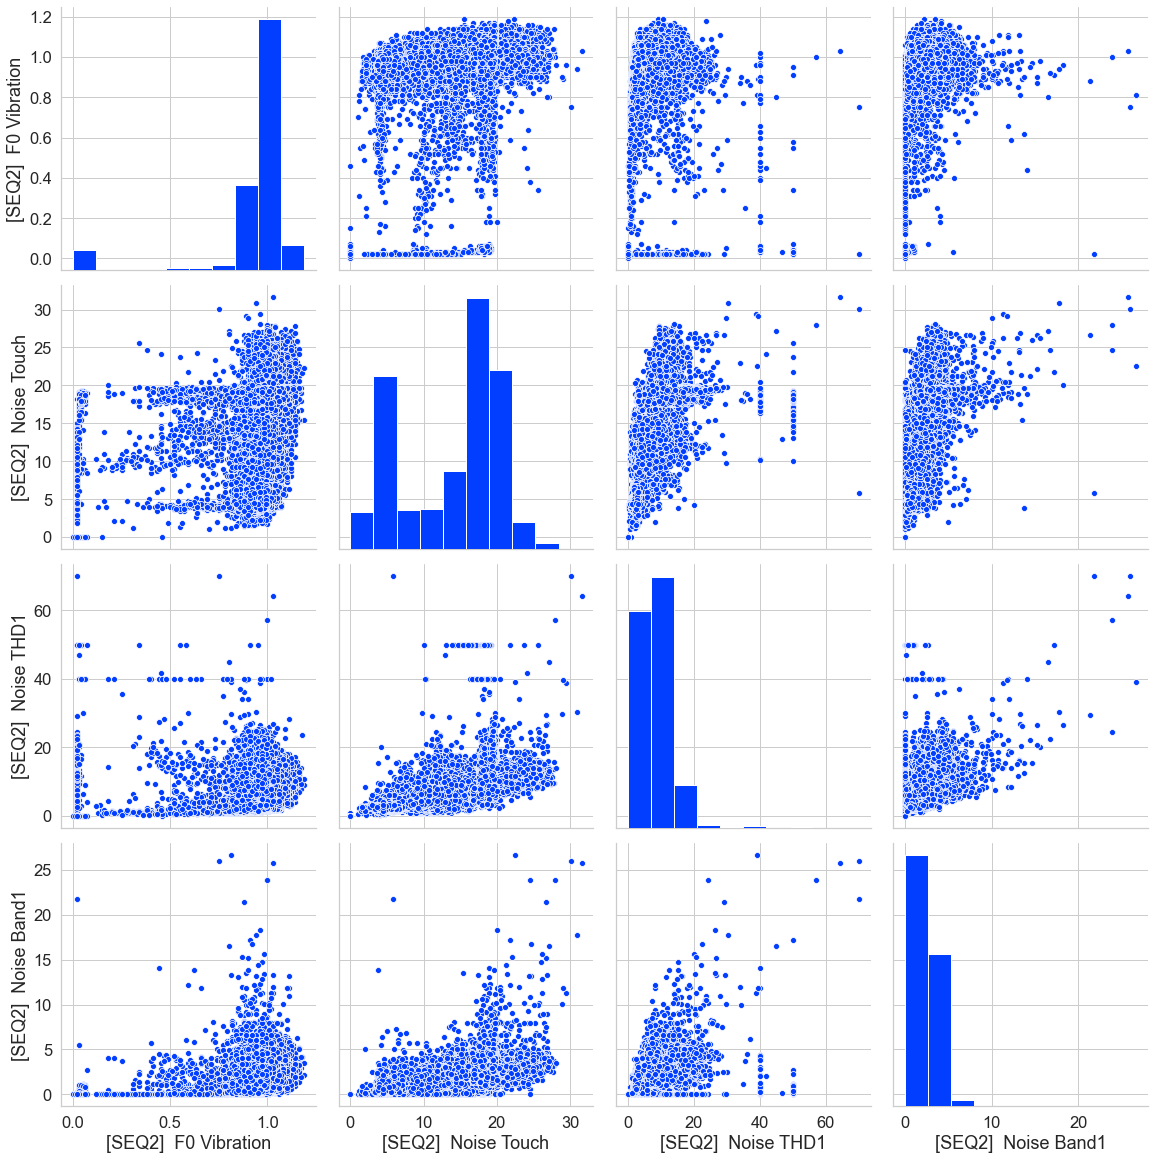

In [53]:
plt.style.use('dark_background') 
sns.set(style="whitegrid",palette="bright", font_scale=1.5) 
sns.pairplot(SEQ2_df, height=4)

##### 주파수별로 상관관계를 확인했을 때, 약한 선형관계를 보이거나 거의 관계가 없음이 나타났다.
##### 이로써, Vibration과 Noise의 선형적인 관계는 거의 없다고 볼 수 있다.